In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Generate the LP to optimize over the Universal Polytope

## 1. Compute the (maybe unimodular) simplices 

## 2. Compute the Chirotope

In [59]:
# Initialize the chirotope dictionary by computing the simplices

def initialize_chirotope(point_configuration, rank, tolerance=1e-13):
    n = len(point_configuration)
    chirotope = {}
    possible_simplices = itertools.combinations(range(n), rank)
    for comb in possible_simplices:
        simplex = tuple(comb)
        det = np.linalg.det(np.array([point_configuration[i] for i in simplex]))
        if abs(det) < tolerance:
            chirotope[simplex] = 0
        else:
            chirotope[simplex] = np.sign(det)
    return chirotope

In [60]:
MOTHER_CHIROTOPE = initialize_chirotope(MOTHER_POINTS, MOTHER_RANK)
FANO_CHIROTOPE = initialize_chirotope(FANO_POINTS, FANO_RANK)

## 3. Encode the Wall inequalities

## 4. Encode the Flag inequalities

## 5. Optimize

# Running examples

## 1. The mother of all examples (2D)

In [41]:
# -----------------------------------------------------------------------------
# Data for the 6 vertices of the mother of all examples 2D point configuration.
# Each has 3 coordinates that sum to 4. 

MOTHER_POINTS = {
    0: [4, 0, 0], 1: [0, 4, 0], 2: [0, 0, 4],
    3: [2, 1, 1], 4: [1, 2, 1], 5: [1, 1, 2],
    6: [2, 2, 0]
}

MOTHER_RANK = 3

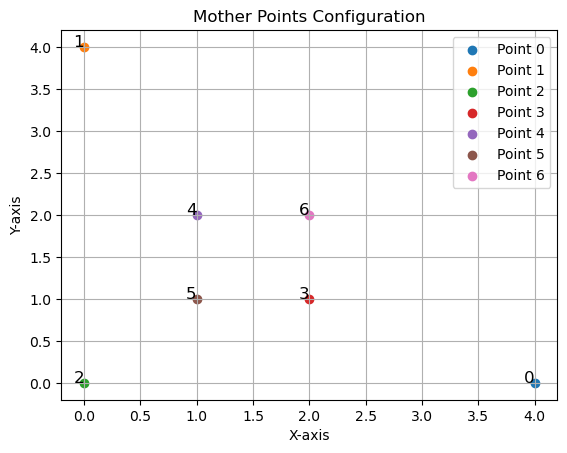

In [24]:
# plot mother points with labels
def plot_mother_points(points):
    fig, ax = plt.subplots()
    for i, point in points.items():
        ax.scatter(*point[:2], label=f'Point {i}')
        ax.text(point[0], point[1], f'{i}', fontsize=12, ha='right')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Mother Points Configuration')
    ax.legend()
    plt.grid()
    plt.show()

plot_mother_points(MOTHER_POINTS)

## 2. The Fano Matroid Polytope (3D)

In [ ]:
# -----------------------------------------------------------------------------
# Data for the 28 vertices of the Fano matroid base polytope.  Each list has
# seven coordinates in {0,1} and sums to 3.  They lie in an affine 6‑space.

FANO_POINTS = {
    0: [0, 1, 0, 0, 0, 1, 1], 1: [0, 0, 1, 0, 0, 1, 1], 2: [0, 0, 0, 1, 0, 1, 1],
    3: [0, 0, 0, 0, 1, 1, 1], 4: [1, 0, 0, 0, 1, 0, 1], 5: [0, 0, 1, 0, 1, 0, 1],
    6: [0, 0, 0, 1, 1, 0, 1], 7: [1, 0, 0, 1, 0, 0, 1], 8: [0, 1, 0, 1, 0, 0, 1],
    9: [1, 0, 1, 0, 0, 0, 1], 10: [0, 1, 1, 0, 0, 0, 1], 11: [1, 1, 0, 0, 0, 0, 1],
    12: [1, 0, 0, 0, 1, 1, 0], 13: [0, 1, 0, 0, 1, 1, 0], 14: [0, 0, 0, 1, 1, 1, 0],
    15: [1, 0, 0, 1, 0, 1, 0], 16: [0, 0, 1, 1, 0, 1, 0], 17: [1, 0, 1, 0, 0, 1, 0],
    18: [0, 1, 1, 0, 0, 1, 0], 19: [1, 1, 0, 0, 0, 1, 0], 20: [0, 1, 0, 1, 1, 0, 0],
    21: [0, 0, 1, 1, 1, 0, 0], 22: [1, 0, 1, 0, 1, 0, 0], 23: [0, 1, 1, 0, 1, 0, 0],
    24: [1, 1, 0, 0, 1, 0, 0], 25: [1, 0, 1, 1, 0, 0, 0], 26: [0, 1, 1, 1, 0, 0, 0],
    27: [1, 1, 0, 1, 0, 0, 0]
}

FANO_RANK = 7

In [62]:
# compute the unimodular simplices of the Fano matroid

# test 
# We know the simplex {0,1,2,3,5,9,18}, {3,4,12,13,14,17,23},{3,4,12,14,17,22,23},{3,5,6,9,11,18,23} are unimodular
# first let's just brutely compute the determinant
simplices = [(0, 1, 2, 3, 5, 9, 18),
            (3, 4, 12, 13, 14, 17, 23),
            (3, 4, 12, 14, 17, 22, 23),
            (3, 5, 6, 9, 11, 18, 23)]
for simplex in simplices:
    det = np.linalg.det(np.array([FANO_POINTS[i] for i in simplex]))
    print(f"Determinant of simplex {simplex}: {det}")

Determinant of simplex (0, 1, 2, 3, 5, 9, 18): -2.9999999999999996
Determinant of simplex (3, 4, 12, 13, 14, 17, 23): -3.0000000000000004
Determinant of simplex (3, 4, 12, 14, 17, 22, 23): 2.9999999999999996
Determinant of simplex (3, 5, 6, 9, 11, 18, 23): -2.9999999999999996


In [120]:
import math
import numpy as np

# --- Fano base polytope vertices in R^7 (28 vertices) ---
FANO_POINTS = {
    0: [0, 1, 0, 0, 0, 1, 1], 1: [0, 0, 1, 0, 0, 1, 1], 2: [0, 0, 0, 1, 0, 1, 1],
    3: [0, 0, 0, 0, 1, 1, 1], 4: [1, 0, 0, 0, 1, 0, 1], 5: [0, 0, 1, 0, 1, 0, 1],
    6: [0, 0, 0, 1, 1, 0, 1], 7: [1, 0, 0, 1, 0, 0, 1], 8: [0, 1, 0, 1, 0, 0, 1],
    9: [1, 0, 1, 0, 0, 0, 1], 10: [0, 1, 1, 0, 0, 0, 1], 11: [1, 1, 0, 0, 0, 0, 1],
    12: [1, 0, 0, 0, 1, 1, 0], 13: [0, 1, 0, 0, 1, 1, 0], 14: [0, 0, 0, 1, 1, 1, 0],
    15: [1, 0, 0, 1, 0, 1, 0], 16: [0, 0, 1, 1, 0, 1, 0], 17: [1, 0, 1, 0, 0, 1, 0],
    18: [0, 1, 1, 0, 0, 1, 0], 19: [1, 1, 0, 0, 0, 1, 0], 20: [0, 1, 0, 1, 1, 0, 0],
    21: [0, 0, 1, 1, 1, 0, 0], 22: [1, 0, 1, 0, 1, 0, 0], 23: [0, 1, 1, 0, 1, 0, 0],
    24: [1, 1, 0, 0, 1, 0, 0], 25: [1, 0, 1, 1, 0, 0, 0], 26: [0, 1, 1, 1, 0, 0, 0],
    27: [1, 1, 0, 1, 0, 0, 0]
}

# Convert to array and precompute all pairwise squared distances (fast, reused)
P = np.array([FANO_POINTS[i] for i in range(len(FANO_POINTS))], dtype=np.float64)  # (28,7)
D2 = np.sum((P[:, None, :] - P[None, :, :])**2, axis=2)  # (28,28) squared Euclidean distances

def cayley_menger_det(indices):
    """
    Cayley-Menger determinant for the simplex with vertex indices 'indices'.
    Returns (determinant, volume_squared, volume).
    For m vertices, the simplex dimension is n = m - 1.
    """
    idx = np.array(indices, dtype=int)
    m = len(idx)                       # number of vertices
    n = m - 1                          # simplex dimension
    # Build the (m+1) x (m+1) CM matrix:
    M = np.ones((m + 1, m + 1), dtype=np.float64)
    M[:m, :m] = D2[np.ix_(idx, idx)]   # top-left block = pairwise d^2
    np.fill_diagonal(M[:m, :m], 0.0)   # ensure exact 0 on diagonal
    M[-1, -1] = 0.0                    # bottom-right corner

    det = float(np.linalg.det(M))
    factor = ((-1)**(n + 1)) / (7 * (2**n))
    vol_sq = factor * det
    # guard small negative due to FP roundoff
    vol = math.sqrt(vol_sq) if vol_sq >= 0 else 0.0
    return vol

simplices = [
    (0, 1, 2, 3, 5, 9, 18),
    (3, 4, 12, 13, 14, 17, 23),
    (3, 4, 12, 14, 17, 22, 23),
    (3, 5, 6, 9, 11, 18, 23),
    (11,15,17,19,20,22,27)
]

for s in simplices:
    vol = cayley_menger_det(s)
    print(f"V = {vol:.6g}")

V = 1
V = 1
V = 1
V = 1
V = 1


In [108]:
np.sqrt(7) / 720

np.float64(0.0036746545987008205)

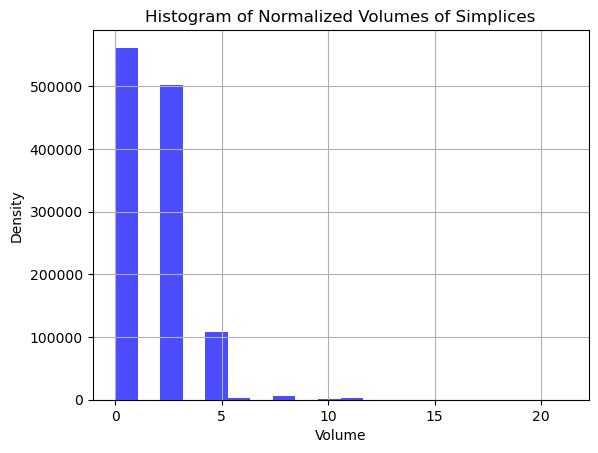

Unique volumes: [2.645751311064574, 2.6457513110645774, 2.6457513110645787, 2.64575131106458, 2.645751311064581, 2.645751311064582, 2.645751311064583, 2.645751311064584, 2.6457513110645854, 2.6457513110645867, 2.645751311064588, 2.6457513110645894, 2.6457513110645903, 2.6457513110645916, 2.6457513110645925, 2.645751311064594, 2.6457513110645947, 2.645751311064596, 2.6457513110645974, 2.6457513110645987, 2.6457513110645996, 2.645751311064601, 2.645751311064602, 2.645751311064603, 2.645751311064608, 5.291502622129172, 5.291502622129174, 5.291502622129177, 5.291502622129179, 5.291502622129181, 5.291502622129183, 5.291502622129186, 5.2915026221291885, 5.291502622129193, 7.937253933193763, 7.9372539331937695, 7.9372539331937775, 7.937253933193785, 10.583005244258349, 10.583005244258358, 10.583005244258368, 10.583005244258377, 21.166010488516736]


In [106]:
# print a histogram of the normalized volumes of all the simplices
def print_volume_histogram(simplices):
    volumes = []
    unique_volumes = set()
    for s in simplices:
        _, vol2, vol = cayley_menger_det(s)
        volumes.append(vol)
        if vol > 1e-6:
            unique_volumes.add(vol)
    
    plt.hist(volumes, bins=20, density=False, alpha=0.7, color='blue')
    plt.title('Histogram of Normalized Volumes of Simplices')
    plt.xlabel('Volume')
    plt.ylabel('Density')
    plt.grid()
    plt.show()
    print(f"Unique volumes: {sorted(unique_volumes)}")

print_volume_histogram(itertools.combinations(range(28), 7))

In [69]:
P[:, None, :]

array([[[0., 1., 0., 0., 0., 1., 1.]],

       [[0., 0., 1., 0., 0., 1., 1.]],

       [[0., 0., 0., 1., 0., 1., 1.]],

       [[0., 0., 0., 0., 1., 1., 1.]],

       [[1., 0., 0., 0., 1., 0., 1.]],

       [[0., 0., 1., 0., 1., 0., 1.]],

       [[0., 0., 0., 1., 1., 0., 1.]],

       [[1., 0., 0., 1., 0., 0., 1.]],

       [[0., 1., 0., 1., 0., 0., 1.]],

       [[1., 0., 1., 0., 0., 0., 1.]],

       [[0., 1., 1., 0., 0., 0., 1.]],

       [[1., 1., 0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 1., 1., 0.]],

       [[0., 1., 0., 0., 1., 1., 0.]],

       [[0., 0., 0., 1., 1., 1., 0.]],

       [[1., 0., 0., 1., 0., 1., 0.]],

       [[0., 0., 1., 1., 0., 1., 0.]],

       [[1., 0., 1., 0., 0., 1., 0.]],

       [[0., 1., 1., 0., 0., 1., 0.]],

       [[1., 1., 0., 0., 0., 1., 0.]],

       [[0., 1., 0., 1., 1., 0., 0.]],

       [[0., 0., 1., 1., 1., 0., 0.]],

       [[1., 0., 1., 0., 1., 0., 0.]],

       [[0., 1., 1., 0., 1., 0., 0.]],

       [[1., 1., 0., 0., 1., 0., 0.]],



In [75]:
test = P[:, None, :] - P[None, :, :]
test[0, :, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., -1.,  0.,  0.],
       [-1.,  1.,  0.,  0., -1.,  1.,  0.],
       [ 0.,  1., -1.,  0., -1.,  1.,  0.],
       [ 0.,  1.,  0., -1., -1.,  1.,  0.],
       [-1.,  1.,  0., -1.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  1.,  0.],
       [-1.,  1., -1.,  0.,  0.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  1.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [-1.,  1.,  0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  1.],
       [ 0.,  1.,  0., -1., -1.,  0.,  1.],
       [-1.,  1.,  0., -1.,  0.,  0.,  1.],
       [ 0.,  1., -1., -1.,  0.,  0.,  1.],
       [-1.,  1., -1.,  0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0., -1., -1.,  1.,  1.],
       [ 0.,  1., -1., -1., -1.,  1.,  1.],
       [-1.,  1., -1.,  0., -1.,

In [78]:
P[0, :] - P[27, :]

array([-1.,  0.,  0., -1.,  0.,  1.,  1.])

In [82]:
np.count_nonzero(P[:, None, :] - P[None, :, :], axis=2)

array([[0, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 6,
        6, 4, 4, 6, 4, 4],
       [2, 0, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 6, 4,
        4, 4, 6, 4, 4, 6],
       [2, 2, 0, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4,
        6, 6, 6, 4, 4, 4],
       [2, 2, 2, 0, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 6, 6, 6],
       [4, 4, 4, 2, 0, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 6, 4, 6, 4, 4, 4,
        2, 4, 2, 4, 6, 4],
       [4, 2, 4, 2, 2, 0, 2, 4, 4, 2, 2, 4, 4, 4, 4, 6, 4, 4, 4, 6, 4, 2,
        2, 2, 4, 4, 4, 6],
       [4, 4, 2, 2, 2, 2, 0, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 6, 6, 6, 2, 2,
        4, 4, 4, 4, 4, 4],
       [4, 4, 2, 4, 2, 4, 2, 0, 2, 2, 4, 2, 4, 6, 4, 2, 4, 4, 6, 4, 4, 4,
        4, 6, 4, 2, 4, 2],
       [2, 4, 2, 4, 4, 4, 2, 2, 0, 4, 2, 2, 6, 4, 4, 4, 4, 6, 4, 4, 2, 4,
        6, 4, 4, 4, 2, 2],
       [4, 2, 4, 4, 2, 2, 4, 2, 4, 0, 2, 2, 4, 6, 6, 4, 4, 2, 4, 4, 6, 4,
        2, 4, 4, 